In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,GRU
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from tensorflow.keras import optimizers, Model
import matplotlib.pyplot as plt
import math

# Load Data

In [117]:
df=pd.read_excel("datalag.xlsx")
# Data yang digunakan yaitu Harga cabai Rawit dan Harga Bawang putih sebagai Barang Subtitusi Sudah dilakukan lag - 1 Minggu

In [118]:
df

,Tanggal,Harga Cabai Merah,Harga Bawang Putih,Harga Cabai Rawit
0,2018-01-08,34450.0,17300.0,28550.0
1,2018-01-15,36050.0,18050.0,33650.0
2,2018-01-22,32650.0,18550.0,33800.0
3,2018-01-29,30450.0,18050.0,35950.0
4,2018-02-05,33100.0,18450.0,36850.0
...,...,...,...,...
286,2023-07-03,46500.0,33350.0,32050.0
287,2023-07-10,42050.0,33500.0,34450.0
288,2023-07-17,37850.0,35300.0,33450.0
289,2023-07-24,34000.0,34650.0,30550.0


# Statistical Analytics

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tanggal             291 non-null    datetime64[ns]
 1   Harga Cabai Merah   290 non-null    float64       
 2   Harga Bawang Putih  290 non-null    float64       
 3   Harga Cabai Rawit   290 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.2 KB


In [120]:
df.shape

(291, 4)


Statistik Deskriptif Harga:
count      290.000000
mean     34295.517241
std      13216.572271
min      16150.000000
25%      24875.000000
50%      30975.000000
75%      38837.500000
max      98450.000000
Name: Harga Cabai Merah, dtype: float64


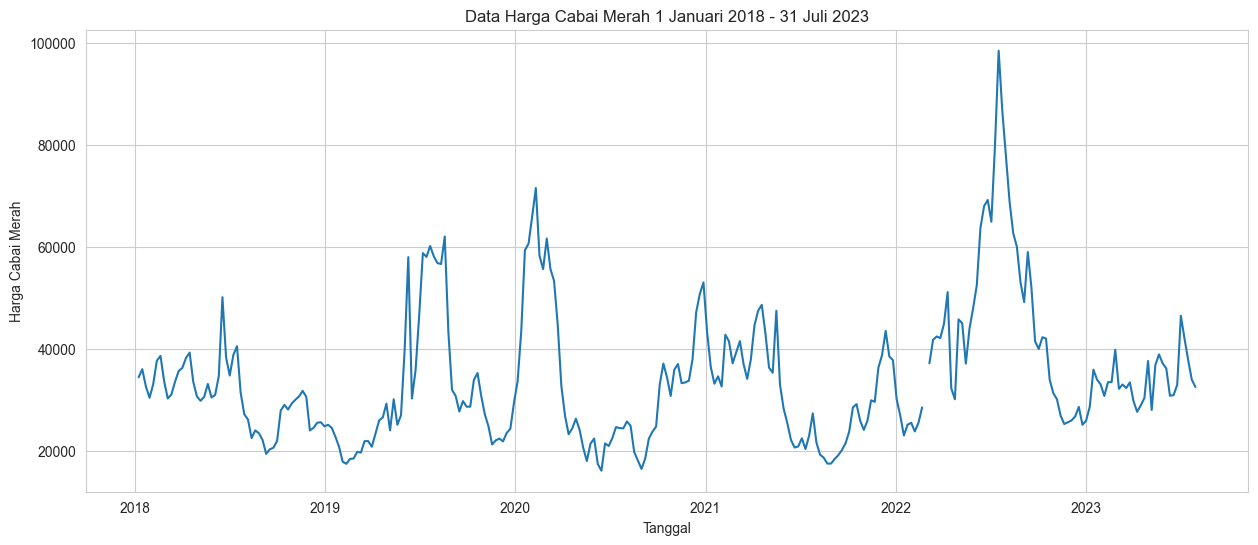

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
harga_stats = df['Harga Cabai Merah'].describe()
print("\nStatistik Deskriptif Harga:")
print(harga_stats)
plt.figure(figsize=(15, 6))
plt.plot(df['Tanggal'], df['Harga Cabai Merah'])
plt.title('Data Harga Cabai Merah 1 Januari 2018 - 31 Juli 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai Merah')
plt.show()

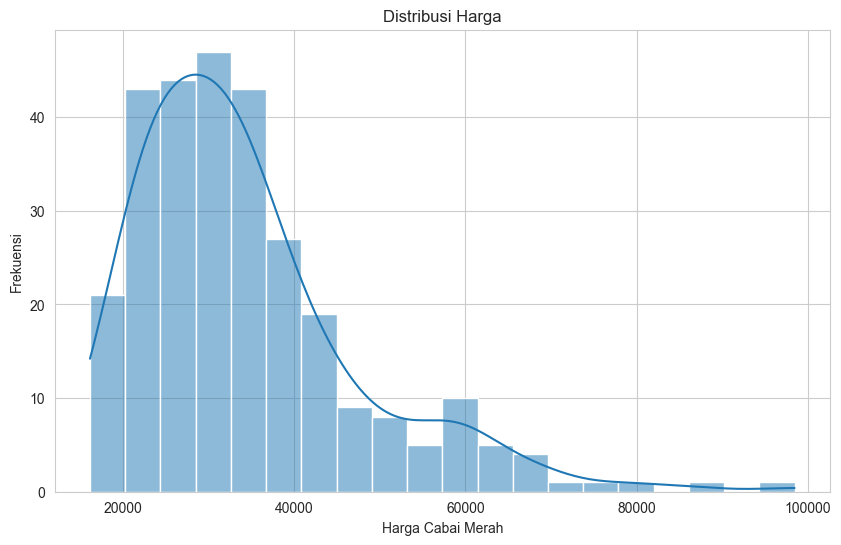

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Harga Cabai Merah'], kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga Cabai Merah')
plt.ylabel('Frekuensi')
plt.show()

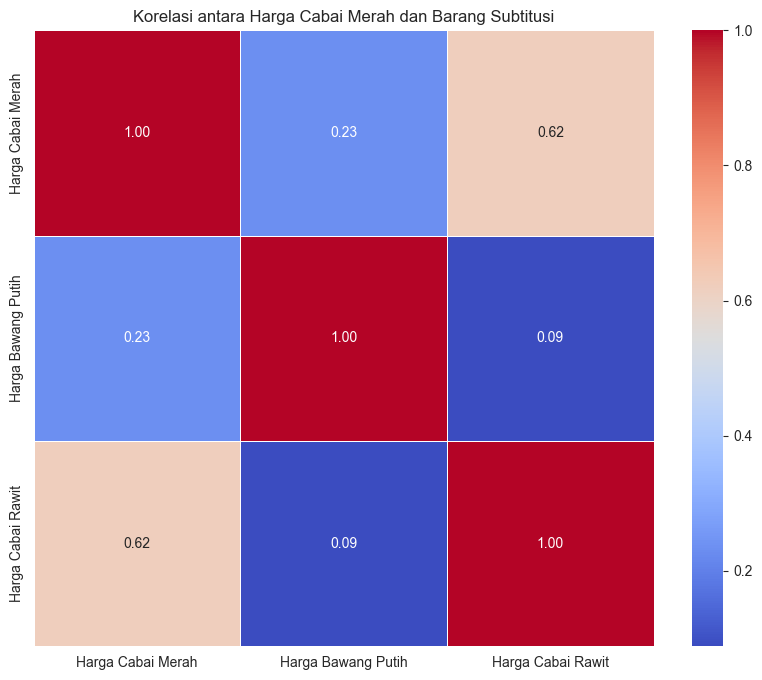

In [123]:
corr_with_target = df[['Harga Cabai Merah','Harga Bawang Putih','Harga Cabai Rawit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Harga Cabai Merah dan Barang Subtitusi')
plt.show()

In [124]:
df.describe()

,Harga Cabai Merah,Harga Bawang Putih,Harga Cabai Rawit
count,290.000000,290.000000,290.000000
mean,34295.517241,24686.379310,35611.379310
std,13216.572271,5891.786171,15873.674911
min,16150.000000,15800.000000,16700.000000
25%,24875.000000,21712.500000,22975.000000
50%,30975.000000,23450.000000,32000.000000
75%,38837.500000,26150.000000,42412.500000
max,98450.000000,52950.000000,89150.000000


# Preprocessing Data


In [125]:
df['Harga Cabai Merah'] = df['Harga Cabai Merah'].astype('float64')
df['Harga Bawang Putih'] = df['Harga Bawang Putih'].astype('float64')
df['Harga Cabai Rawit'] = df['Harga Cabai Rawit'].astype('float64')

In [126]:
df.isnull().sum()

Tanggal               0
Harga Cabai Merah     1
Harga Bawang Putih    1
Harga Cabai Rawit     1
dtype: int64

In [127]:
df = df.fillna(df.mean())

C:\Users\ihsan\AppData\Local\Temp\ipykernel_7036\114435927.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


In [128]:
scaler_rr = MinMaxScaler(feature_range=(0, 1))
scaler_harga = MinMaxScaler(feature_range=(0, 1))
df['Harga Cabai Merah_Scaled'] = scaler_harga.fit_transform(df[['Harga Cabai Merah']])
df['Harga Bawang Putih_Scaled'] = scaler_rr.fit_transform(df[['Harga Bawang Putih']])
df['Harga Cabai Rawit_Scaled'] = scaler_rr.fit_transform(df[['Harga Cabai Rawit']])

In [129]:
df

,Tanggal,Harga Cabai Merah,Harga Bawang Putih,Harga Cabai Rawit,Harga Cabai Merah_Scaled,Harga Bawang Putih_Scaled,Harga Cabai Rawit_Scaled
0,2018-01-08,34450.0,17300.0,28550.0,0.222357,0.040377,0.163561
1,2018-01-15,36050.0,18050.0,33650.0,0.241798,0.060565,0.233954
2,2018-01-22,32650.0,18550.0,33800.0,0.200486,0.074024,0.236025
3,2018-01-29,30450.0,18050.0,35950.0,0.173755,0.060565,0.265700
4,2018-02-05,33100.0,18450.0,36850.0,0.205954,0.071332,0.278123
...,...,...,...,...,...,...,...
286,2023-07-03,46500.0,33350.0,32050.0,0.368773,0.472409,0.211870
287,2023-07-10,42050.0,33500.0,34450.0,0.314702,0.476447,0.244997
288,2023-07-17,37850.0,35300.0,33450.0,0.263670,0.524899,0.231194
289,2023-07-24,34000.0,34650.0,30550.0,0.216889,0.507402,0.191166


# Split Data

In [130]:
selected_columns = ['Harga Cabai Merah_Scaled','Harga Bawang Putih_Scaled','Harga Cabai Rawit_Scaled']
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)][selected_columns].values
        dataX.append(a)
        dataY.append(dataset[i + look_back:i + look_back + 1]['Harga Cabai Merah_Scaled'].values)
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], len(selected_columns)))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], len(selected_columns)))

# Pembuatan Model

from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

new_learning_rate = 0.001
custom_optimizer = Nadam(learning_rate=new_learning_rate)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 3), activation='tanh', recurrent_activation='sigmoid', bias_initializer='zeros'))
model.add(LSTM(50, return_sequences=False, activation='tanh', recurrent_activation='sigmoid', bias_initializer='zeros'))
model.add(Dense(1))

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(trainX, trainY, epochs=150, batch_size=64, verbose=2)


In [131]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 3), activation='relu'))
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=60, batch_size=64, verbose=2)


Epoch 1/60
4/4 - 2s - loss: 0.0577 - 2s/epoch - 590ms/step
Epoch 2/60
4/4 - 0s - loss: 0.0540 - 12ms/epoch - 3ms/step
Epoch 3/60
4/4 - 0s - loss: 0.0505 - 18ms/epoch - 5ms/step
Epoch 4/60
4/4 - 0s - loss: 0.0469 - 13ms/epoch - 3ms/step
Epoch 5/60
4/4 - 0s - loss: 0.0435 - 10ms/epoch - 3ms/step
Epoch 6/60
4/4 - 0s - loss: 0.0399 - 15ms/epoch - 4ms/step
Epoch 7/60
4/4 - 0s - loss: 0.0365 - 11ms/epoch - 3ms/step
Epoch 8/60
4/4 - 0s - loss: 0.0325 - 12ms/epoch - 3ms/step
Epoch 9/60
4/4 - 0s - loss: 0.0288 - 13ms/epoch - 3ms/step
Epoch 10/60
4/4 - 0s - loss: 0.0255 - 17ms/epoch - 4ms/step
Epoch 11/60
4/4 - 0s - loss: 0.0222 - 14ms/epoch - 4ms/step
Epoch 12/60
4/4 - 0s - loss: 0.0197 - 6ms/epoch - 1ms/step
Epoch 13/60
4/4 - 0s - loss: 0.0176 - 10ms/epoch - 3ms/step
Epoch 14/60
4/4 - 0s - loss: 0.0157 - 10ms/epoch - 2ms/step
Epoch 15/60
4/4 - 0s - loss: 0.0153 - 10ms/epoch - 2ms/step
Epoch 16/60
4/4 - 0s - loss: 0.0147 - 20ms/epoch - 5ms/step
Epoch 17/60
4/4 - 0s - loss: 0.0150 - 10ms/epoch -

In [132]:
predictions = model.predict(testX)
predictions = scaler_harga.inverse_transform(predictions)
testY = scaler_harga.inverse_transform(testY)

2/2 [==============================] - 0s 0s/step


In [133]:
trainY = scaler_harga.inverse_transform(trainY)

# Hasil Akhir

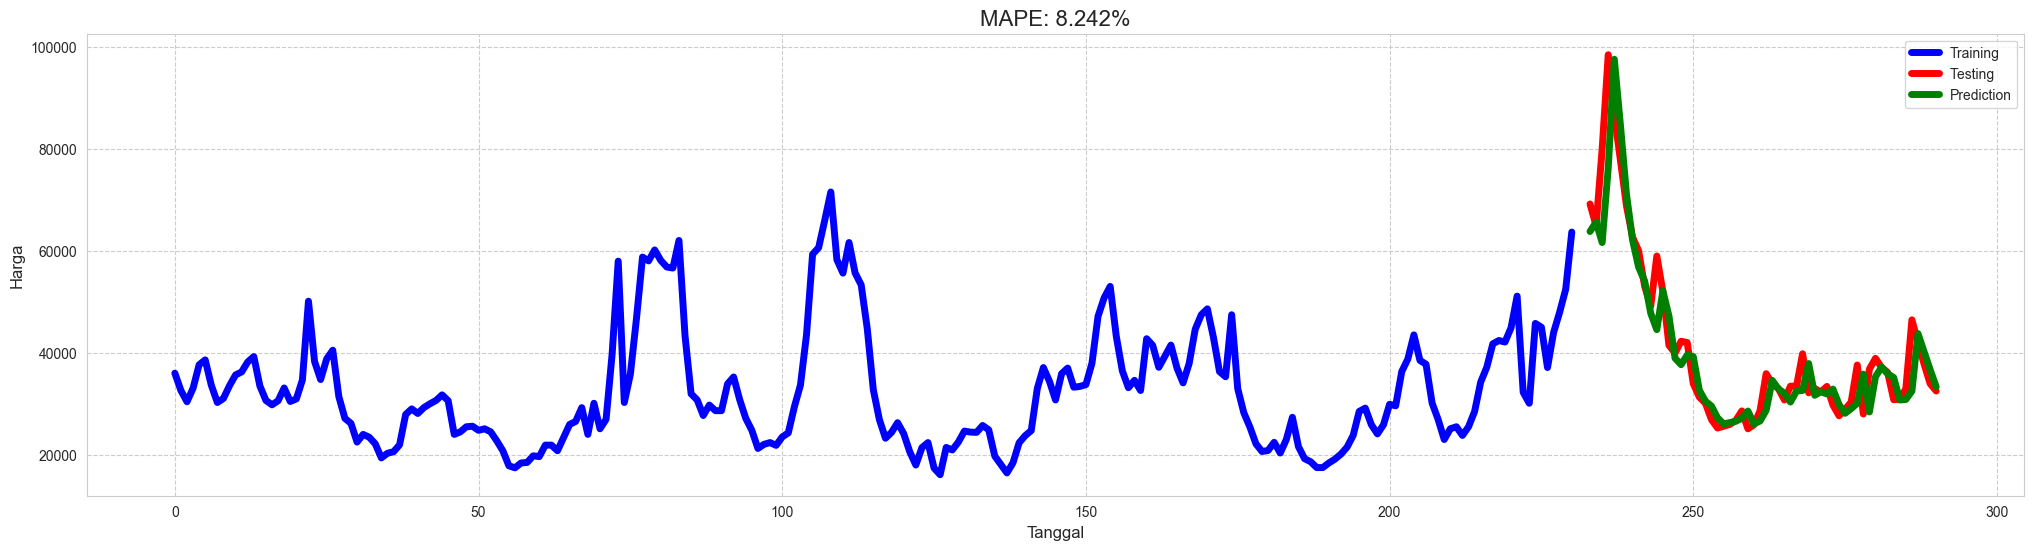

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(testY, predictions)*100
plt.figure(figsize=(25, 6))
plt.plot(df.index[:len(trainY)], trainY, label='Training', marker='', color='blue', linestyle='-', linewidth=5)
plt.plot(df.index[-len(testY):], testY, label='Testing ', marker='', color='red', linestyle='-', linewidth=5)
plt.plot(df.index[-len(predictions):], predictions, label='Prediction', marker='', color='green', linestyle='-', linewidth=5)
plt.title(f'MAPE: {mape:.3f}%', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.grid(True, linestyle='--', alpha=1)
plt.legend()
plt.xticks(rotation=0)
plt.show()